### Student Information
Name:林柏全

Student ID:110137501

GitHub ID:bartonlin

Kaggle name:NTOwO

Kaggle private scoreboard snapshot:
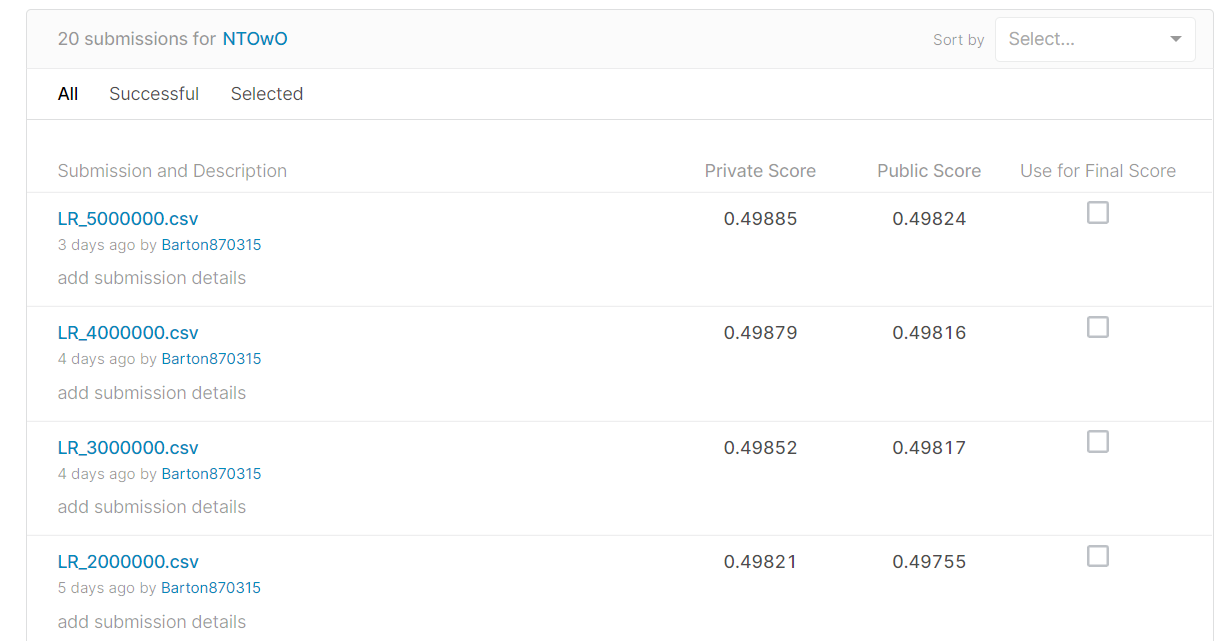

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [2]:
### Begin Assignment Here

### >>> Exercise 1 (Take home):
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [ ]:
# Answer here
import nltk

train_tokenized_text = []
test_tokenized_text = []

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

for sentence in train_df['text']:
    train_tokenized_text += tokenizer.tokenize(sentence)

train_cal_word_frequency = nltk.FreqDist(train_tokenized_text)
print(train_cal_word_frequency.most_common(30))
train_plot = nltk.FreqDist(dict(train_cal_word_frequency.most_common()[:30]))
train_plot.plot()

for sentence in test_df['text']:
    test_tokenized_text += tokenizer.tokenize(sentence)
    
test_cal_word_frequency = nltk.FreqDist(test_tokenized_text)
print(test_cal_word_frequency.most_common(30))
test_plot = nltk.FreqDist(dict(test_cal_word_frequency.most_common()[:30]))
test_plot.plot()

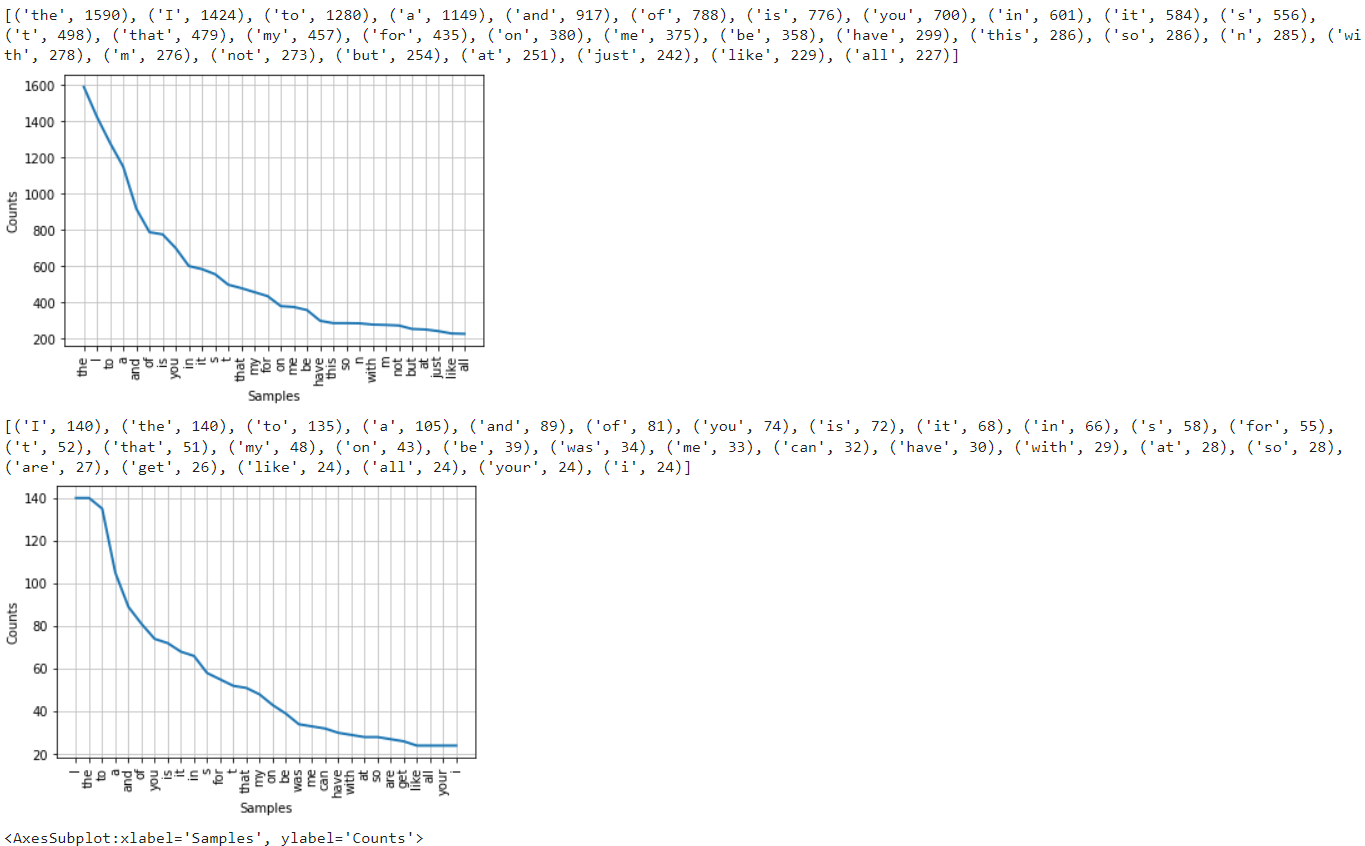

### >>> Exercise 2 (Take home):
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
import sklearn

# build analyzers (bag-of-words)
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train_df['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

transformer = sklearn.feature_extraction.text.TfidfTransformer(smooth_idf=True)
train_data_BOW_features_1000_tfidf = transformer.fit_transform(train_data_BOW_features_1000)
r = pd.DataFrame(train_data_BOW_features_1000_tfidf.toarray(),columns=BOW_1000.get_feature_names())
print("TFIDF")
r

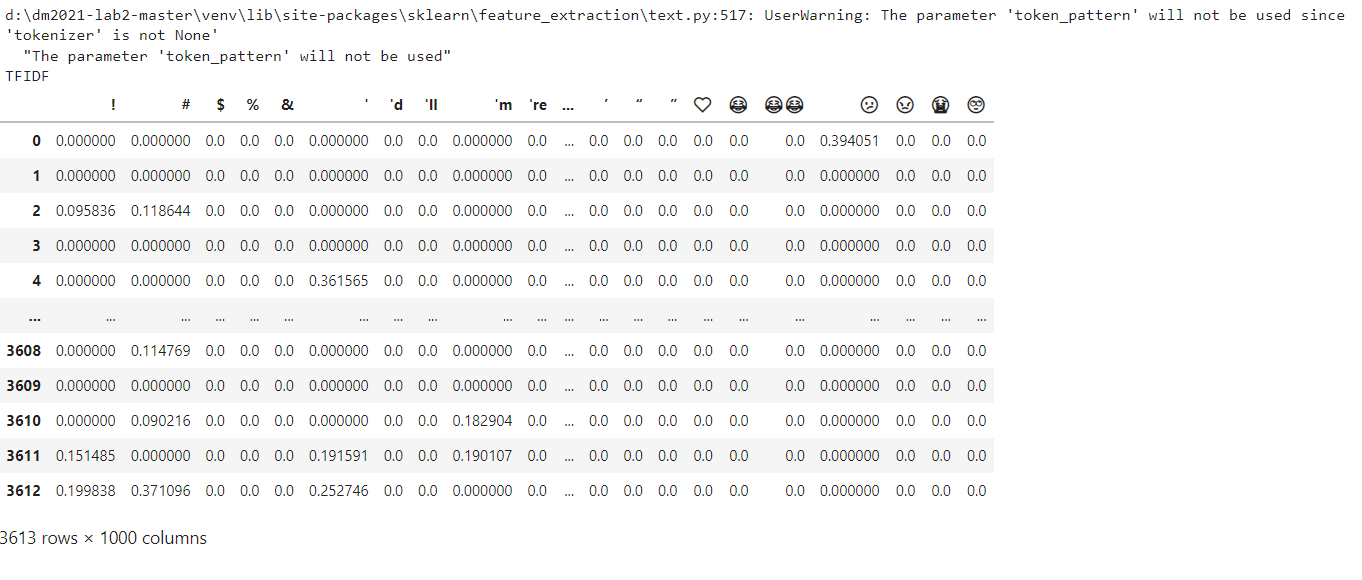

### >>> Exercise 3 (Take home):
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
'''
training accuracy: 0.99
testing accuracy: 0.66
The accuracy of training data set is 99% but the accuracy of testing data set is only 66%, 
so it is overfitting.

The first column present all the sentences are label anger predict 58 sentences as anger, 
                                                           predict 14 sentences as fear,
                                                           predict 9 sentences as joy,
                                                           predict 9 sentences as sadness.
The second column present all the sentences are label fear predict 16 sentences as anger, 
                                                           predict 74 sentences as fear,
                                                           predict 11 sentences as joy,
                                                           predict 13 sentences as sadness.
The third column present all the sentences are label joy predict 6 sentences as anger, 
                                                         predict 10 sentences as fear,
                                                         predict 52 sentences as joy,
                                                         predict 8 sentences as sadness.
The fourth column present all the sentences are label sadness predict 4 sentences as anger, 
                                                              predict 12 sentences as fear,
                                                              predict 7 sentences as joy,
                                                              predict 44 sentences as sadness.
'''

### >>> Exercise 4 (Take home):
Build a model using a Naive Bayes model and train it. What are the testing results?

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

## build multinomial Naive Bayes classifier model
mnb = MultinomialNB()

## training!
mnb = mnb.fit(X_train, y_train)

## predict!
y_train_pred_mnb = mnb.predict(X_train)
y_test_pred_mnb = mnb.predict(X_test)

## so we get the pred result
y_test_pred_mnb[:10]

# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred_mnb)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred_mnb)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
print(classification_report(y_true=y_test, y_pred=y_test_pred_mnb))

## check by confusion matrix
cm_mnb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_mnb) 
print(cm_mnb)

# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_mnb, classes=my_tags, title='Confusion matrix')

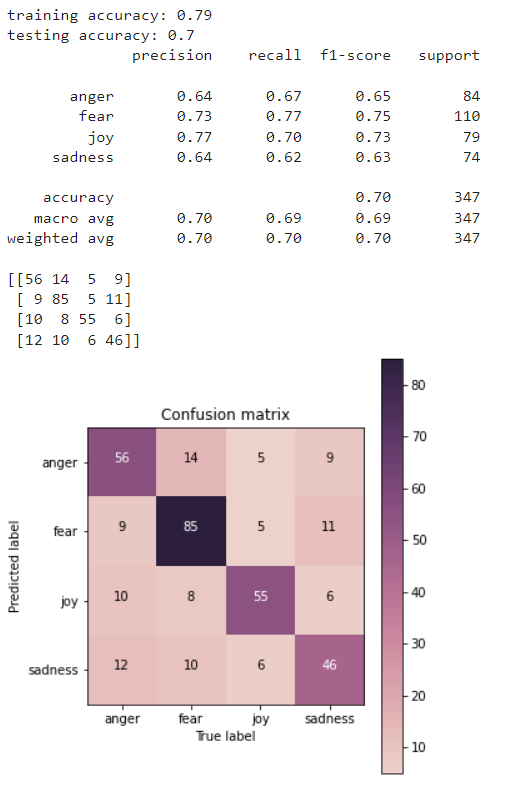

### >>> Exercise 5 (Take home):
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
'''
The Decition Tree mode is easily lead to overfitting, 
and Naive Bayes has better training score but still need more stronger model to get better score.
'''

### >>> Exercise 6 (Take home):
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [ ]:
# Answer here
training_log.plot(x="epoch", y=["accuracy", "val_accuracy"])
training_log.plot(x="epoch", y=["loss", "val_loss"])

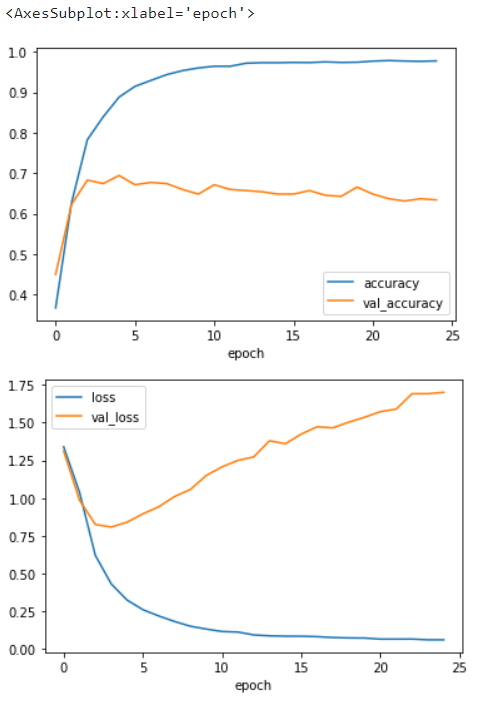

### >>> Exercise 7 (Take home):
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

In [ ]:
# Answer here
'''
We can first transfer sentences to tokens(tensorflow or nltk) ,
and use gensim api to generate each token's word vectors then modify as a array for training.
'''

### >>> Exercise 8 (Take home):
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = angry_words + happy_words + sad_words + fear_words
color = ['b'] * topn + ['g'] * topn + ['r'] * topn + ['y'] * topn

size = 200
target_size = len(target_words)
all_word = model.index_to_key
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

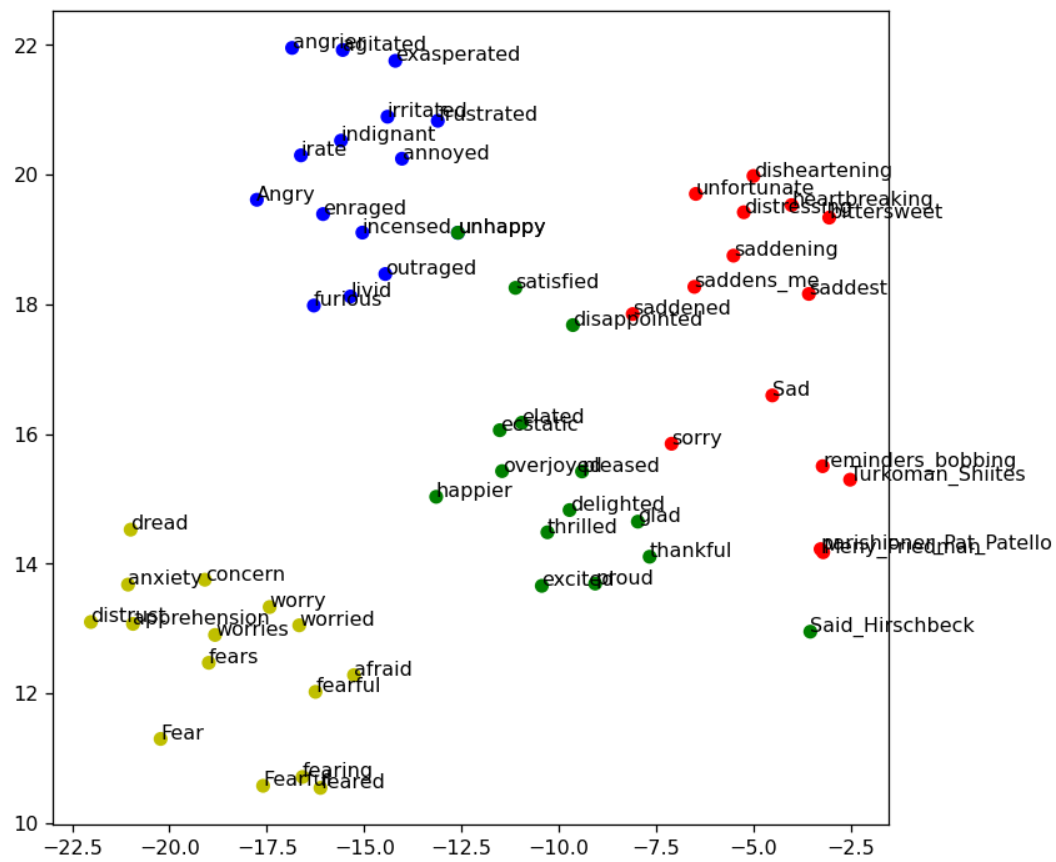

## Report of Kaggle

#### Read Data

In [ ]:
import pandas as pd
import numpy as np
import json
data_id = pd.read_csv('data_identification.csv')
data_emotion = pd.read_csv('emotion.csv')
usr= pd.read_json('tweets_DM.json', lines=True)

#### Divide dataset into train data & test data

In [ ]:
train_x = data_id.loc[lambda a: a.identification=='train']
test_x = data_id.loc[lambda a: a.identification=='test']

#### Sort by tweet_id

In [ ]:
train_x.sort_values(by=['tweet_id'], inplace=True, ignore_index=True)
train_x[:10]

#### Normalize semi-structured JSON data into a flat table.

In [ ]:
test = pd.io.json.json_normalize(usr['_source'])
test

#### Get the features I want to train with

In [ ]:
result = pd.concat([usr['_score'], test], axis = 1)
result.columns = ['score', 'hashtags', 'tweet_id', 'text']
result

#### Joint the data by user ID and add emotion

In [ ]:
test_x_final = pd.merge(test_x, result)
test_x_final

#### Transform the text into feature by TFIDF
transform feature by word based and character based then stack two transform features
, use function to use different max_features variables

In [ ]:
import sklearn.linear_model
import scipy.sparse
import sklearn.feature_extraction
def test_loop(features_flag):
    tfv_word = sklearn.feature_extraction.text.TfidfVectorizer(min_df=150,  max_features=features_flag,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,6),stop_words = 'english')
    tfv_word.fit(train_x_final['text'])
    train_tfv_word =  tfv_word.transform(train_x_final['text'])
    test_tfv_word = tfv_word.transform(test_x_final['text'])
    
    tfv_char = sklearn.feature_extraction.text.TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=features_flag)
    tfv_char.fit(train_x_final['text'])
    train_tfv_char = tfv_char.transform(train_x_final['text'])
    test_tfv_char = tfv_char.transform(test_x_final['text'])
    
    train_tfidf = scipy.sparse.hstack([train_tfv_word, train_tfv_char])
    test_tfidf = scipy.sparse.hstack([test_tfv_word, test_tfv_char])

    print('logistic Regression')
    y = train_x_final['emotion']
    lr = sklearn.linear_model.LogisticRegression(max_iter=1e+10)
    lr.fit(train_tfidf, y)
    tf_predict = lr.predict(test_tfidf)
    #change datatype from array to pd
    tf_predict2 = pd.DataFrame(tf_predict)
    temp = tf_predict2
    #add id into output
    output = pd.concat([test_x_final['tweet_id'], temp], axis=1)
    #rename
    output = output.rename(columns={'tweet_id':'id'})
    #output[lambda a: a.'0'=='emotion']
    output = output.rename(columns={0:'emotion'})
    #saveFile
    output.to_csv('LR_'+str(features_flag)+'.csv', index = False)

In [ ]:
for i in range(250000, 9000000, 1000000):
    print(i)
    test_loop(i)

#### What I found the experience
First, I do some research and found this paper.
>A. Yousaf et al., "Emotion Recognition by Textual Tweets Classification Using Voting Classifier (LR-SGD)," in IEEE Access, vol. 9, pp. 6286-6295, 2021, doi: 10.1109/ACCESS.2020.3047831.

After study some methods on the paper I decide to use TF-IDF and Logistic Regression as my method.

In the experiment, I found that don't do pre-processing got better result.

Pre-processing include remove number, punctuation, replace the capital letter and stemming.

The reason that pre-processing got bad result might because people often use capital letters, numbers, and punctuation as emoticons, so they may not express the emotions of the text correctly if they have been remove or replace.

(LE_25000 is the result without pre-processing with max_feature=25000, 
FE_LR_25000 is the pre-processing result with max_feature=25000)
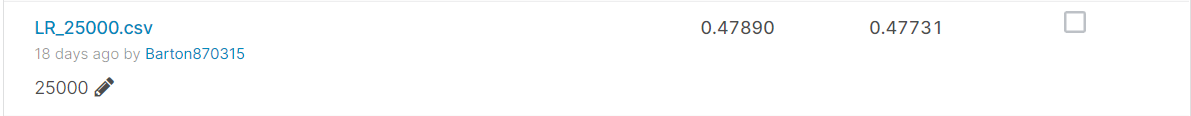

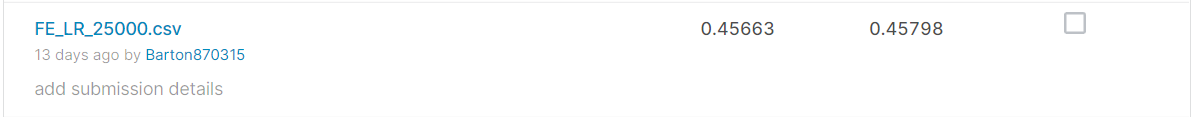

I found text transform feature increase can improve the accuracy
below cell is what I try in tfidf

In [1]:
# max_features= 25000
# max_features= 30000
# max_features= 35000
# max_features= 40000
# max_features= 200000
# max_features= 500000
# max_features= 600000
# max_features= 700000
# max_features= 1000000
# max_features= 1500000
# max_features= 2000000
# max_features= 3000000
# max_features= 4000000
# max_features= 5000000